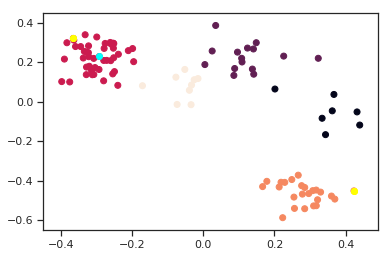

In [50]:
import imports

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; 
sns.set(
    style="ticks", 
    color_codes=True, 
#    style="darkgrid"
)

from datasets import testloader
from initialisations import skmi2020 as skmi
from kmeans import distance_table
from metrics import accuracy
import nbutils

#dataset = testloader._load_local('5_2_1000_r_1.5_010')
dataset = testloader._load_local('skmi_test')
data = dataset.data
target = dataset.target

C = []
K = 5  #20


def calc_density(point, data):
    
    APC = int(len(data)/K)
    
    neighbours = APC+1
    
    dists = distance_table(np.array([point]), data)[0]
    idx = np.argpartition(dists, neighbours)
    subdists = dists[idx[:neighbours]]
    total = np.sum(subdists)    
    return total
    

def find_first_centroid(data):
    """The first promising point"""

    density = [calc_density(point, data) for point in data]    
    return data[np.argmin(density)] #, data[np.argmax(remoteness)]


def find_furthest(temp_centroids, data):
    
    mean_so_far = np.mean(temp_centroids, axis=0)
    
    dists = distance_table(np.array([mean_so_far]), data)[0]
    return data[np.argmax(dists)]
    
    


first = find_first_centroid(data)

# plt.figure(figsize=(5, 4))

# my_c = None
my_c = target

# the main data
plt.scatter(data[:, 0], data[:, 1], c=my_c)

plt.scatter(first[0], first[1], c='cyan')

temp_centroids = np.array([HDP])

while len(temp_centroids) < K:
    furthest = find_furthest(temp_centroids, data)

    plt.scatter(furthest[0], furthest[1], c='yellow')
    temp_centroids = np.vstack((temp_centroids, furthest))

    
# plt.tight_layout()
plt.show()